In [1]:
import pandas as pd

# Data

In [40]:
# Read
data = pd.read_csv('covid_mex_20200401.csv')

In [41]:
# 6 abril 2020
# data[(data['Region'] == 'JALISCO') & ((data['Origin'].isnull()))].sort_values('Date_Symptoms').count()
# data[(data['Region'] == 'JALISCO') & ((data['Origin'].notnull()))].count()

In [42]:
# 4 abril 2020
#data[(data['Region'] == 'JALISCO') & ((~data['Origin'].str.contains('NA')))].count()
#data[(data['Region'] == 'JALISCO') & (data['Origin'] == 'Contacto')].count()

In [43]:
# Region delta (ie, new cases)
cum_df = (data.groupby(['Region','Date_Confirmed'])['Date_Confirmed'].count()).to_frame()

In [44]:
# Rename because duplicate index
cum_df['Region_Delta'] = cum_df['Date_Confirmed']

In [45]:
# Region cumulative by date
cum_df['Region_Cumulative'] = cum_df.groupby(['Region'])['Region_Delta'].cumsum()

In [46]:
# Clean up
cum_df = cum_df.drop(['Date_Confirmed'], axis=1)

In [47]:
# Mexico cumulative by date
cum_df['Mexico_Cumulative'] = cum_df.groupby(['Date_Confirmed'])['Region_Cumulative'].cumsum()

In [48]:
# To view full table:
# from IPython.core.display import HTML
# display(HTML(cum_df.to_html()))

In [49]:
cum_df.to_csv('output_data/mexico/confirmed_long_format.csv')

# Tables

In [50]:
pivot_tbl_cum = cum_df.reset_index().pivot('Region','Date_Confirmed','Region_Cumulative').T.fillna(0)

In [56]:
pivot_tbl_delta = cum_df.reset_index().pivot('Region','Date_Confirmed','Region_Delta').T

In [52]:
#pivot_tbl_cum.fillna(0).to_csv('output_data/mexico/confirmed_cases_by_date.csv', index=True)
#pivot_tbl_delta.fillna(0).to_csv('output_data/mexico/daily_confirmed_cases_by_date.csv', index=True)

# Plots

In [53]:
from numpy import *
import math
import matplotlib.pyplot as plt

### Confirmed cases

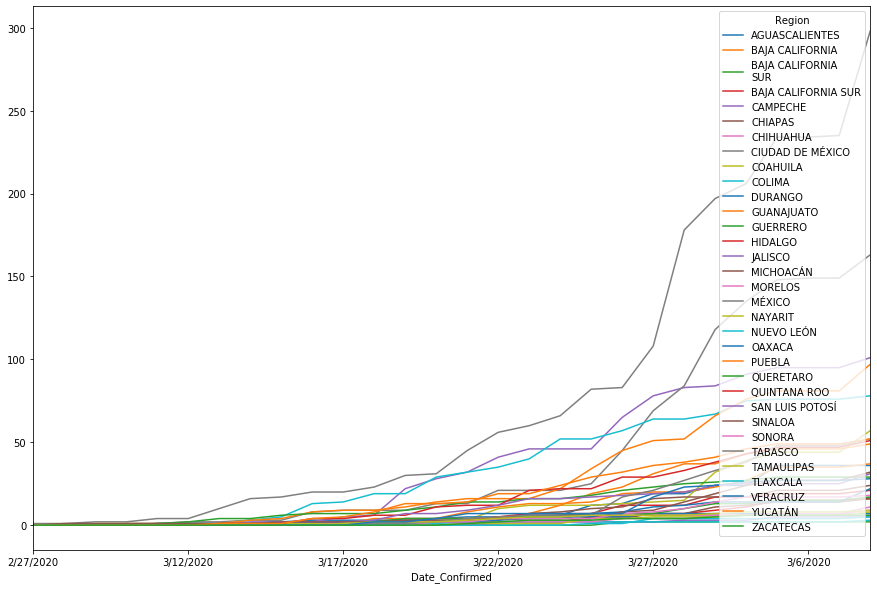

In [54]:
pivot_tbl_delta.fillna(0).cumsum().plot(figsize=(15,10))
#pivot_tbl_delta.fillna(0).cumsum()[['NUEVO LEÓN','CIUDAD DE MÉXICO','JALISCO']].plot(figsize=(15,10))

### Growth rate (linear)

Notice there are no dates - all we care is about the growth rate (so each region starts at day 0 from first case).

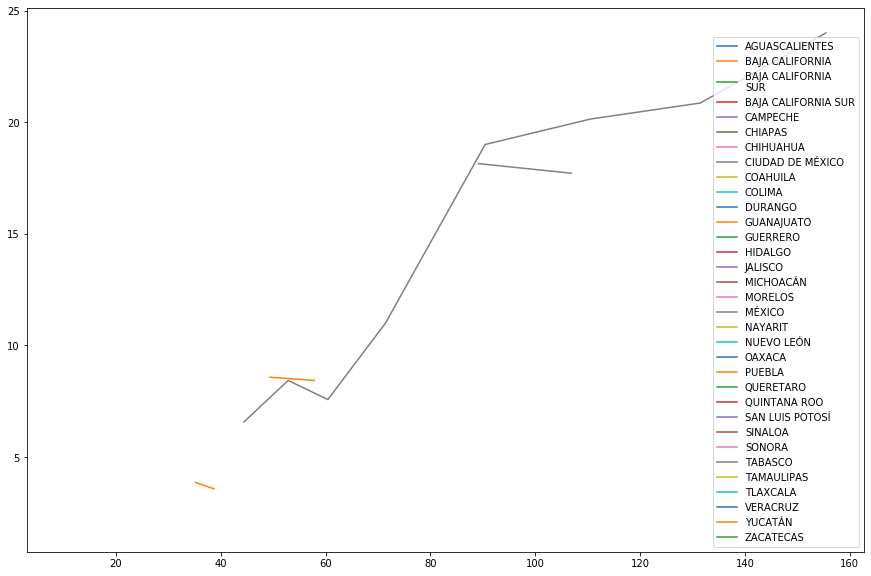

In [66]:
plt.figure(figsize=(15,10))

for state in ['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA\nSUR',
       'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA',
       'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'MICHOACÁN', 'MORELOS', 'MÉXICO',
       'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERETARO',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS']:
    plt.plot(list(pivot_tbl_cum[state].rolling(window=7).mean()), list(pivot_tbl_delta[state].rolling(window=7).mean()), label=state) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('linear')
plt.xscale('linear')

plt.show()

### Growth rate (log scale)

Now let's take a look at log scale...

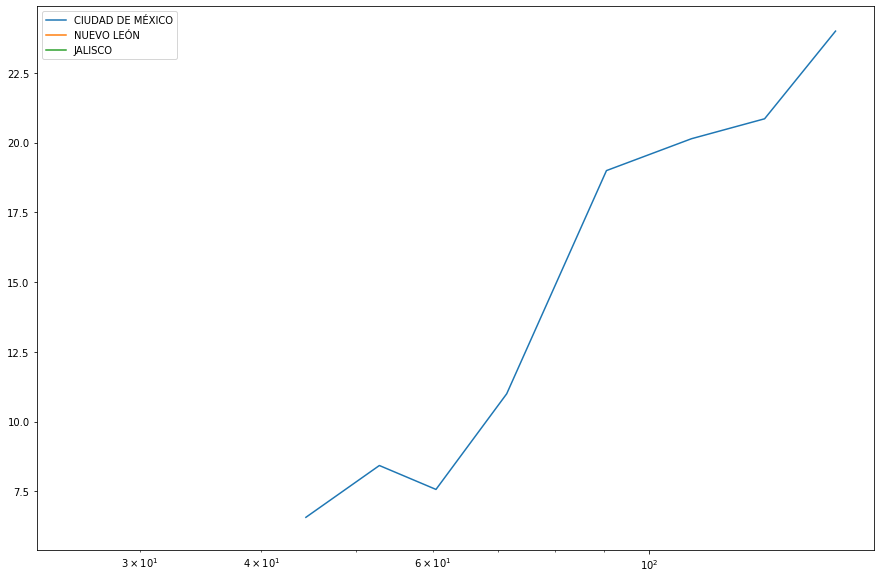

In [69]:
plt.figure(figsize=(15,10))

for state in ['CIUDAD DE MÉXICO', 'NUEVO LEÓN', 'JALISCO']:
    plt.plot(list(pivot_tbl_cum[state].rolling(window=7).mean()), list(pivot_tbl_delta[state].rolling(window=7).mean()), label = state) # plotting t, c separately 
    # pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('linear')
plt.xscale('log')

plt.show()

### Starting at date wcertain number of cases

Because more comparative? Dunno

In [72]:
def select_min_cases(df, min):
    
    df2_state = []
    df2_date= []
    df2_cases= []

    for state in df.columns:
        #print(df.columns)
        for index in range(len(df[state])):
            if df[state][index] >= min:
                #print(state)
                #print(df[state].index[index])
                #print((df[state][index]))
                df2_state.append(state)
                df2_date.append(df[state].index[index])
                df2_cases.append(df[state][index])
            #if df[state][index] < num:
                #print(None)
    my_df = pd.DataFrame({'Region': pd.Series(df2_state), 'Date_Confirmed': pd.Series(df2_date), 'Region_Cumulative': pd.Series(df2_cases)})
    #my_df = my_df.set_index(['Region','Date_Confirmed'])
    return my_df

In [73]:
min_cases = select_num_cases(pivot_tbl_cum, 15).reset_index()

NameError: name 'select_num_cases' is not defined

In [74]:
min_cases

NameError: name 'min_cases' is not defined

In [70]:
min_cases = min_cases.reset_index().pivot('Region','Date_Confirmed','Region_Cumulative').T

NameError: name 'min_cases' is not defined

In [71]:
min_cases = min_cases.set_index(pd.DatetimeIndex(min_cases['Date_Confirmed'])).sort_index()

NameError: name 'min_cases' is not defined